
<h1 style="color:#5784BA ; font-family: serif;text-align: center"> Analyse exploratoire des données immobilières</h1>
<h1 style="color:#5784BA; font-family: serif;text-align: center"> Représentation graphique Matplotlib et plotly</h1>




<h1 style="color: #5784BA; font-family: serif;">Table des matières</h1>

* Contexte
* Objectifs
* Les indicateurs
* Les technologies utilisés
* <a href="#C1">Jupyter Notebook</a>
    * <a  href="#C2">Importation des données</a>
    * <a href="#C3">Nettoyage des données </a>
    * <a  href="#C4"> Modification des données</a>
    * <a  href="#C5">Création de nouvelles colonnes</a>
    * <a  href="#C6">Rapport pandas profiling</a>
    * <a  href="#C7">Analyse descriptive et répresentation graphique</a>
        * <a href="#C8">Density_headmap</a>
        * <a href="#C9">Histogramme</a>
        * <a href="#C10">Boxplot</a>
        * <a href="#C11">Nuages de points</a>   
        * <a href="#C12">Pie Chart</a>
        


## Contexte

Nous allons réaliser une analyse exploratrice de données immobilère.
L'étude du nombre de transactions immobilières permet d'analyser la tendance des marchés immobiliers. Cette analyse du nombre de transactions immobilières peut être déclinée au niveau des départements ou des communes, pour des sous marchés immobiliers tels que les logements neufs ou anciens ou selon les caractéristiques principales des logements.
* Nb ventes
* Nb pièces
* parking/garage
* Etiquette énergie


## Objecifs
* Réalisation d'un audit des données
* Nettoyer les données
* Créer la colonne Nom de commune en fonction du code postal en réalisant une fusion des données  télécharger sur datagouv 
* Créer la colonne département avec une fonction.

Ensuite nous allons utiliser pandas profiling, une librairie qui génère un rapport au format HTML.

Dans ce rapport nous y retrouvons, organisé de manière séquentielle (ou via le menu du haut) :

* Une synthèse permettant de trouver les : données manquantes, cardinalité.
* Des informations de bases comme: Le nombre de colonnes/lignes, les données manquantes ou en doublon, la mémoire occupée, etc.

Par colonne:

* Des statistiques quantiles: valeur minimale, Q1, médiane, Q3, maximum, plage, plage interquartile
* Des Statistiques descriptives telles que la moyenne, médiane, écart-type, somme, écart absolu médian, coefficient de variation, kurtosis, asymétrie
* Inférence de type : Les types des données réelles constatés dans le jeu de données (chaînes catégorielles, numériques, etc.)
* Les Valeurs les plus fréquentes
* Distribution des valeurs (Histogrammes)
* Une analyse détaillée des corrélations mettant en évidence des variables hautement corrélées, matrices Spearman, Pearson et Kendall 
* Matrice des valeurs manquantes, comptage, carte thermique et dendrogramme des valeurs manquantes



## Indicateurs
Il est à présent temps de calculer quelques indicateurs :

* Calculer le nombre de vente par département et par années
* Nombre de ventes en fonction du prix et par nom de commune
* Calculer la somme des vente par départements et Année
* Nombre de ventes par département, Année et nature du bien ( Appartement ou maison)
* Différence de prix entre le prix estimé et le prix de vente
* Durée entre la date de l'annonce et la date de vente
* Corrélation entre le prix de vente et les variables qualitatives
* Analysez des variable quantitative et une qualitative( prix de vente)
* Répartition des ventes selon le diagnostique thermique de la ville de Limoges

## Technologies et méthodes utilisées
Librairie python
* Pandas: permet la manipulation et l'analyse des données. 
* numpy : destinée à manipuler des matrices ou tableaux multidimensionnels ainsi que des fonctions mathématiques opérant sur ces tableaux.
* ydata_profiling import ProfileReport: génère un rapport automatique pour l’analyse de données
* matplotlib: destinée à tracer et visualiser des données sous forme de graphiques
* plotly.express: Ce module contient des fonctions qui permettent de créer des figures entières en une seule fois, Plotly Express fait partie intégrante de la bibliothèque plotly.Inspiré de Seaborn et ggplot2, il a été spécialement conçu pour créer des tracés interactifs en un seul appel de fonction, y compris les facettes, les cartes, les animations, et lignes de tendance. Il est livré avec des ensembles de données, des échelles de couleurs et des thèmes intégrés. 
Github ou ce Jupyter notebook est hébergé ne permet pas de visualiser les sorties. J'ai donc utilisé la librairie suivantes afin de visualiser le graphique créé.
* U kaleido: Kaleido est une bibliothèque multiplateforme pour générer des images statiques (par exemple, png, svg, pdf, etc.) pour les bibliothèques de visualisation basées sur le Web


## Jupyter Notebook
### Importation des librairies Python
Importons dans un premier temps l'ensemble des librairies Python :

In [3]:
import pandas as pd
import numpy as np
#from pandas_profiling import ProfileReport
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px



### <a name="C2">Importation des données </a> 

In [4]:
df= pd.read_excel('excel/bdd_immo.xlsx')

#### Visualisation des données

Les 5 premières lignes

In [5]:
df.head()

,type,nature,superficie,jardin,garage,secteur,CP,prix estimation,prix vente,date annonce,date vente,Diag therm
0,T7,maison,60,1793,NaN,nord,87100,58023,48000,2013-05-26,2013-09-03,C
1,T3,app,60,1775,oui,nord,87100,58136,55000,2013-10-19,2015-05-11,C
2,T3,app,60,1764,NaN,nord,87100,58384,54000,2014-02-22,2015-01-07,D
3,T7,maison,61,1762,oui,ouest,87280,60117,50000,2013-08-10,2013-11-04,C
4,T4,app,61,1759,NaN,nord,19100,60413,47000,2014-06-15,2015-10-16,C


### <a name="C3">Nettoyez votre jeu de données</a>



#### Informations sur le jeu de données



In [6]:
df.shape

(499, 12)

#### Intitulés des colonnes


In [7]:
df.columns

Index(['type', 'nature', 'superficie', 'jardin', 'garage', 'secteur', 'CP',
       'prix estimation', 'prix vente', 'date annonce', 'date vente',
       'Diag therm'],
      dtype='object')

#### Le types des variables 
Info affiche le tableau contenant les noms de colonne, le nombre de valeurs non nulles et les types de données.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   type             499 non-null    object        
 1   nature           499 non-null    object        
 2   superficie       499 non-null    int64         
 3   jardin           499 non-null    int64         
 4   garage           193 non-null    object        
 5   secteur          499 non-null    object        
 6   CP               499 non-null    int64         
 7   prix estimation  499 non-null    int64         
 8   prix vente       499 non-null    int64         
 9   date annonce     499 non-null    datetime64[ns]
 10  date vente       499 non-null    datetime64[ns]
 11  Diag therm       499 non-null    object        
dtypes: datetime64[ns](2), int64(5), object(5)
memory usage: 46.9+ KB



#### Valeurs manquantes


In [9]:
df.isnull().sum()

type                 0
nature               0
superficie           0
jardin               0
garage             306
secteur              0
CP                   0
prix estimation      0
prix vente           0
date annonce         0
date vente           0
Diag therm           0
dtype: int64

#### Affiche uniquement les variables qui ont des valeurs manquantes

In [10]:
nb_na = df.isnull().sum()
nb_na[nb_na>0]

garage    306
dtype: int64

On observe que notre jeu de données contient 306 valeurs manquantes dans la colonne 'garage'. Regardons les plus en détails :

In [11]:
df.garage.value_counts()

oui    193
Name: garage, dtype: int64

La seule valeur renseignée est oui donc on peut en déduire que les valeurs manquantes peuvent être remplacés par Non

#### Remplace les valeurs null par 'non'

In [12]:
df.loc[df['garage'].isnull(), 'garage'] = 'non'

#### Table de fréquence de la colonne garage. 


In [13]:
df.garage.value_counts()

non    306
oui    193
Name: garage, dtype: int64

### <a name="C4">Modification des données </a> 

#### Création de la colonne: Nom de commune

Nous allons utiliser la colonne Code postale (CP)

Sur le site de datagouv.fr j'ai téléchargé le fichier csv  **Base officielle des codes postaux**

https://www.data.gouv.fr/fr/datasets/base-officielle-des-codes-postaux/

Description

La base officielle des codes postaux est un jeu de données qui fournit la correspondance entre les codes postaux et les codes INSEE des communes, de France (métropole et DOM), des TOM, ainsi que de MONACO.

Ce jeu de données comprend :

- Le nom de la commune

- Le code INSEE de la commune

- La ligne 5 de l'adresse postale : précision du lieu-dit associé ou du nom de la commune déléguée associée

- Le code postal de la commune

- Le libellé d’acheminement



Chargement du fichier csv

In [14]:
code_postal= pd.read_csv('laposte_hexasmal.csv', sep=';')

In [15]:
code_postal.head()


,Code_commune_INSEE,Nom_commune,Code_postal,Ligne_5,Libellé_d_acheminement,coordonnees_geographiques
0,25615,VILLARS LES BLAMONT,25310,NaN,VILLARS LES BLAMONT,"47.368383721,6.871414913"
1,25619,LES VILLEDIEU,25240,NaN,LES VILLEDIEU,"46.713906258,6.26583065"
2,25622,VILLERS BUZON,25170,NaN,VILLERS BUZON,"47.228558434,5.852186748"
3,25625,VILLERS LA COMBE,25510,NaN,VILLERS LA COMBE,"47.240809828,6.473842387"
4,25627,VILLERS SOUS CHALAMONT,25270,NaN,VILLERS SOUS CHALAMONT,"46.901588322,6.045328224"


In [16]:
code_postal.dtypes

Code_commune_INSEE           object
Nom_commune                  object
Code_postal                   int64
Ligne_5                      object
Libellé_d_acheminement       object
coordonnees_geographiques    object
dtype: object

Renomme la colonne la 'Code_postal'en 'CP' afin d'avoir le même non de colonne pour joindre ce dataframe à notre dataframe de données immobilière

In [17]:
code_postal=code_postal.rename(columns={ 'Code_postal':'CP',
                                 
                                    })

Merge des deux dataframes

In [18]:
import pandas as pd
df = pd.merge(df,code_postal[['CP','Nom_commune']],on='CP', how='left')

#### Création colonne 'département'

Définir une fonction afin de créer une colonne 'département' en fonction de la colonne 'CP'

In [19]:
def dep(x):
    if x[:2]== "19":
        return "Corrèze"
    elif x[:2]== "23":
        return 'Creuse'
    elif x[:2]== "87":
        return 'Haute-vienne'
    elif x[:2]== "24":
        return 'Dordogne'
    elif x[:2]== "33":
        return 'Gironde'
    
#test    
dep('87450')

'Haute-vienne'

Changement de type de la varible CP afin d'appliquer la fonction sans message d'erreur

In [20]:
df['CP'] = df['CP'].apply(lambda x: str(x))
print(df['CP'].dtypes) # Can verify to see that CP prints out as an object

object


Applique la fonction 

In [21]:
df['departement']= df['CP'].apply(dep)


Le nom de la commune et le département sont désormais présents dans la dataframe

In [22]:
df.sample(10)

,type,nature,superficie,jardin,garage,secteur,CP,prix estimation,prix vente,date annonce,date vente,Diag therm,Nom_commune,departement
662,T3,app,89,90,non,ouest,24800,149536,113000,2014-05-25,2015-02-23,D,EYZERAC,Dordogne
594,T4,app,88,119,non,nord,24800,146491,106000,2014-03-10,2014-09-12,E,ST PIERRE DE COLE,Dordogne
1567,T3,app,175,0,non,ouest,87800,367004,262000,2014-06-06,2015-07-25,C,MEILHAC,Haute-vienne
699,T3,app,90,0,non,est,87800,152654,114000,2014-02-07,2014-06-02,D,MEILHAC,Haute-vienne
1517,T2,app,173,0,non,nord,87800,358184,338000,2014-04-24,2014-08-13,A,LA ROCHE L ABEILLE,Haute-vienne
543,T5,maison,87,139,oui,ouest,24800,143413,127000,2013-07-17,2015-01-01,E,CHALAIS,Dordogne
793,T5,app,104,0,non,nord,33100,180809,138000,2014-01-05,2014-11-14,D,BORDEAUX,Gironde
1105,T2,app,142,0,non,nord,87800,275923,199000,2014-08-13,2014-11-16,G,MEILHAC,Haute-vienne
457,T6,maison,84,409,non,nord,19360,129611,103000,2013-07-21,2013-11-08,D,MALEMORT,Corrèze
745,T7,maison,101,0,oui,sud,23100,171507,136000,2013-04-11,2014-08-05,B,ST ORADOUX DE CHIROUZE,Creuse


In [23]:
df['Année'] = pd.DatetimeIndex(df['date vente']).year



### <a name="C6">Rapport Pandas-profiling </a> 

Un fichier rapport.html est alors généré. Ce rapport complet présente toutes les informations utiles pour commencer à travailler les données.
Ce rapport ne peux être affiché car GitHup ne prend pas en charge l'affichage.

In [24]:
#profile = ProfileReport(df, title='Analyse des données immobilière',
#                        dataset={
 #       "description": "Ce rapport a été généré par Eve Telega",
#        "copyright_holder": "Eve Telega",
#       "copyright_year": "2023"} ,
#        html={'style':{'full_width':True}})# Affichage adapté à Jupyter
#profile.to_notebook_iframe()# Rapport HTML
#profile.to_widgets()# Affichage adapté à Jupyter

Enregistrement au format html. 

In [25]:
#profile.to_file("analyse_data_immo.html")

Visualisation du rapport.

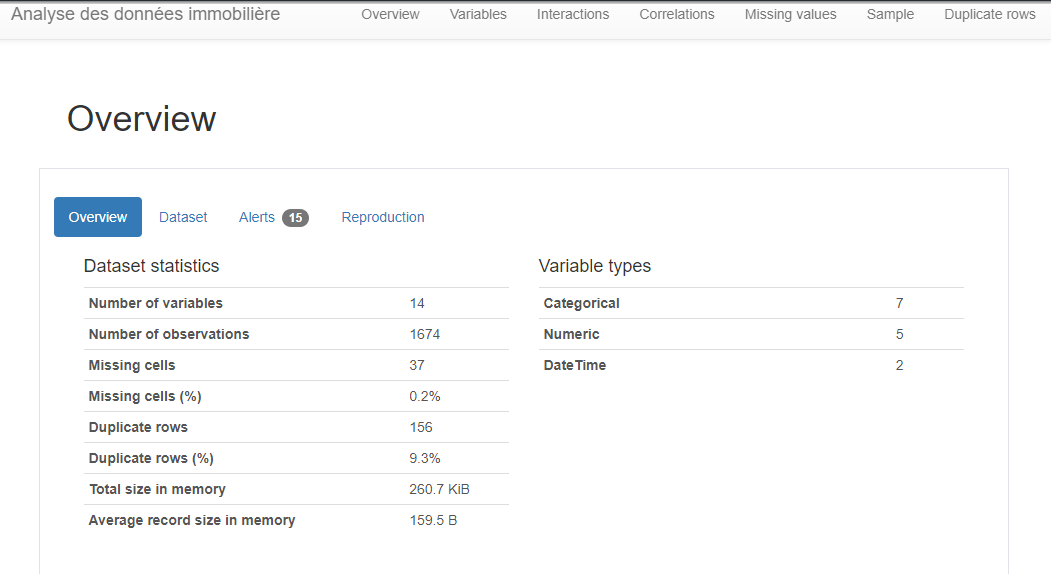

In [26]:
from IPython.display import Image
Image("profile.png")

 Exportation du rapport vers un fichier html


In [27]:
#profile.to_file("analyse_data_immo.html")

Après exploration de ce rapport, on observe que la colonne 'Nom_commune' contient 37 valeurs manquantes. Regardons les plus en détails 


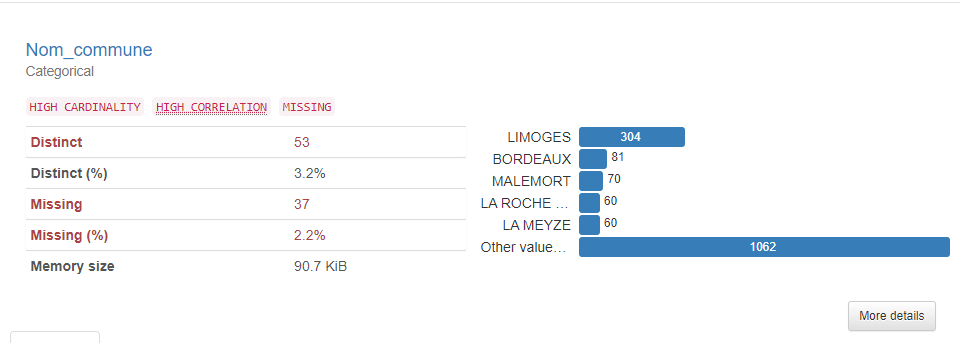

In [28]:
from IPython.display import Image
Image("missing.png")

Le code postale renseigner est 87450 alors que ce code postale n'existe pas. Nous conservons les lignes car le département 87 est la Haute-vienne. 

In [29]:
df.loc[df['Nom_commune'].isnull(),:]

,type,nature,superficie,jardin,garage,secteur,CP,prix estimation,prix vente,date annonce,date vente,Diag therm,Nom_commune,departement,Année
29,T2,app,63,1600,non,nord,87450,63243,55000,2014-04-29,2016-03-14,F,NaN,Haute-vienne,2016
41,T3,app,64,1586,non,nord,87450,65112,57000,2014-01-11,2014-08-30,C,NaN,Haute-vienne,2014
142,T5,app,69,1257,non,nord,87450,80875,70000,2013-08-20,2014-04-19,D,NaN,Haute-vienne,2014
247,T2,app,75,831,non,nord,87450,94406,71000,2014-02-14,2014-12-05,B,NaN,Haute-vienne,2014
298,T5,maison,76,765,non,nord,87450,97527,86000,2013-04-14,2015-02-11,E,NaN,Haute-vienne,2015
380,T4,app,80,562,non,ouest,87450,114066,108000,2014-02-06,2014-12-13,E,NaN,Haute-vienne,2014
443,T2,app,83,440,non,nord,87450,126865,108000,2014-07-26,2016-03-24,C,NaN,Haute-vienne,2016
491,T4,app,87,260,non,sud,87450,135379,100000,2014-05-19,2015-03-31,E,NaN,Haute-vienne,2015
526,T2,app,87,180,non,nord,87450,140175,113000,2014-06-02,2015-05-05,E,NaN,Haute-vienne,2015
735,T2,app,100,0,oui,nord,87450,169100,163000,2013-11-30,2014-05-20,E,NaN,Haute-vienne,2014


Corrélation entre les variables.

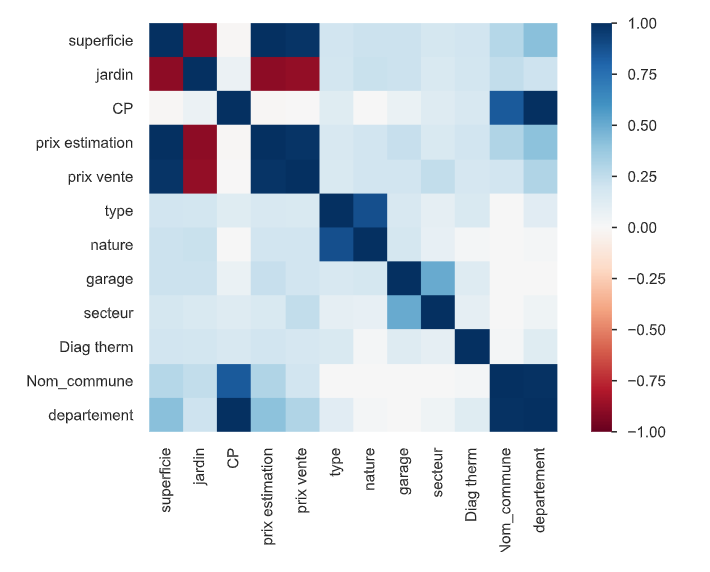

In [30]:
from IPython.display import Image
Image("corr.png")

En toute logique, il a une forte corrélation entre le prix de vente et la superficie et le prix estimé.



### <a name="C6">Analyse descriptive </a> 





**Les variables qualitatives**

les variables quantitatives : Elles ne s'expriment pas par une valeur numérique
Elles s'expriment par une qualité
Il est possible de les répartir en classes ou catégories
On ne peut pas les exploiter mathématiquement. Il est par exemple impossible d'additionner la valeur "marié" et la valeur "divorcé".

**Les variables quantitatives**
S'expriment par un nombre
Peuvent être exploité mathématiquement

**Les variables temporelles**



### Les Indicateurs


* Calculer le nombre de vente par département et par années
* Nombre de ventes en fonction du prix et par nom de commune
* Calculer la somme des vente par départements et Année
* Nombre de ventes par département, Année et nature du bien ( Appartement ou maison)
* Différence de prix entre le prix estimé et le prix de vente
* Durée entre la date de l'annonce et la date de vente
* Corrélation entre le prix de vente et les variables qualitatives
* Analysez des variable quantitative et une qualitative( prix de vente)
* Répartition des ventes selon le diagnostique thermique de la ville de Limoges

### <a name="C8">Density_headmap </a> 

Dans une carte thermique de densité, les lignes de dataframe sont regroupées en tuiles rectangulaires colorées pour visualiser la distribution 2D d'une fonction d'agrégation histfunc.

#### Combien de transactions immobilières par départements ou communes ?


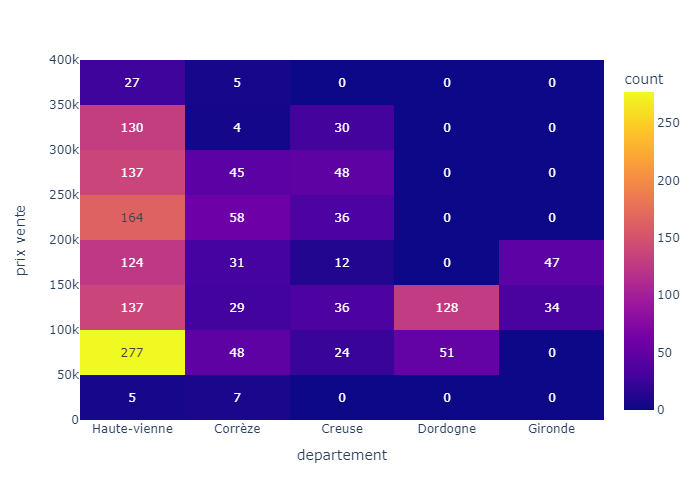

In [31]:
import plotly.express as px


fig = px.density_heatmap(df, x="departement", y="prix vente", text_auto=True)
fig.show(renderer='png')


Le graphique permet de visualiser rapidement que la haute-vienne est le département qui a fait le plus de vente. 

Nombre de ventes en fonction du prix et par nom de commune

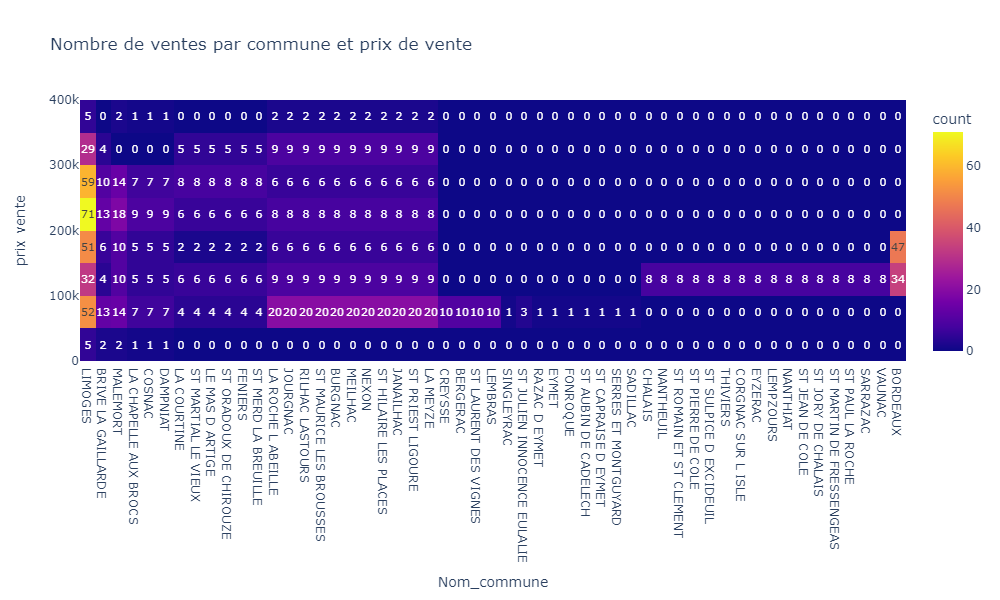

In [32]:
import plotly.express as px


fig = px.density_heatmap(df, x="Nom_commune", y="prix vente", 
                         text_auto=True, 
                         width=1000, 
                         height=600,
                         title ="Nombre de ventes par commune et prix de vente")
fig.show(renderer='png')

Le graphique suivant est moins visible mais il permet de comprendre que la ville de Limoges a effectué une grande partie des ventes au prix les plus haut. La ville de Bordeaux se démarque aussi

### <a name="C9">Histogramme </a> 

En statistique, un histogramme est une représentation graphique permettant de représenter la répartition empirique d'une variable aléatoire en la représentant avec des colonnes correspondant chacune à une classe
#### Nombre de ventes par departement dans le temps

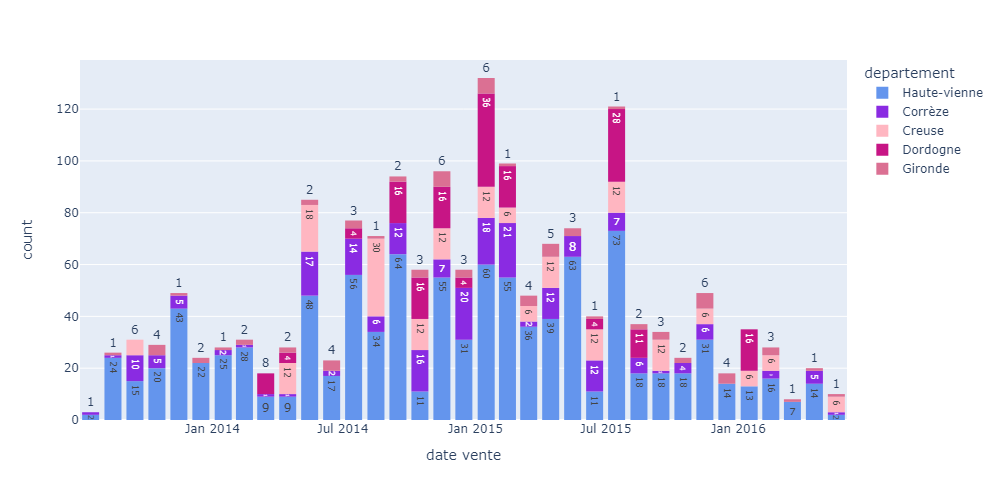

In [33]:
import plotly.express as px

fig = px.histogram(df, x="date vente", color='departement',width=1000, height=500,
                   color_discrete_sequence=["cornflowerblue", "blueviolet",'lightpink','mediumvioletred','palevioletred'],
                   text_auto=True,)
fig.update_layout(bargap=0.2)

fig.show(renderer='png')

#### Total somme des ventes par departement et années 

J'ai facetté le tracé pour distinguer les départements

facet_col="departement"

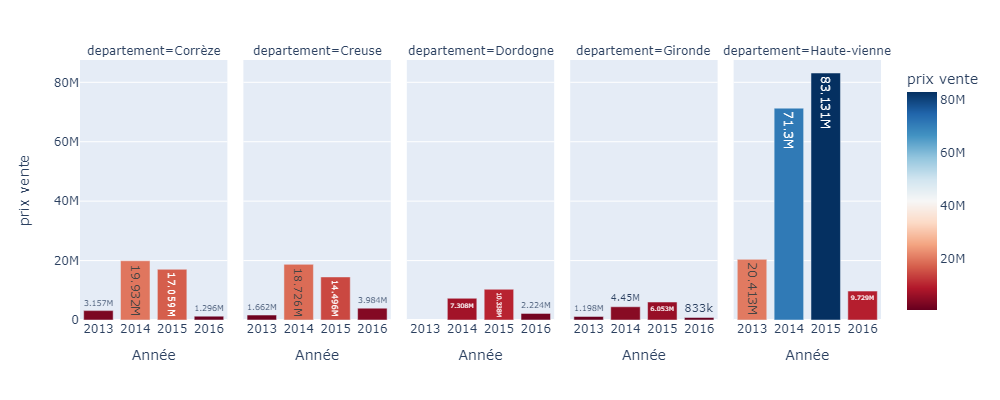

In [34]:
import plotly.express as px
df1 = df.groupby(['departement','Année'])['prix vente'].sum().reset_index()

fig = px.bar(df1, x="Année", y="prix vente", color="prix vente", barmode="group",
                facet_col="departement",
                text_auto=True,
                width=1000, height=400,
                color_continuous_scale='RdBu'
             )
fig.show(renderer='png')





#### Nombre de ventes par département, Année et nature du bien ( Appartement ou maison)

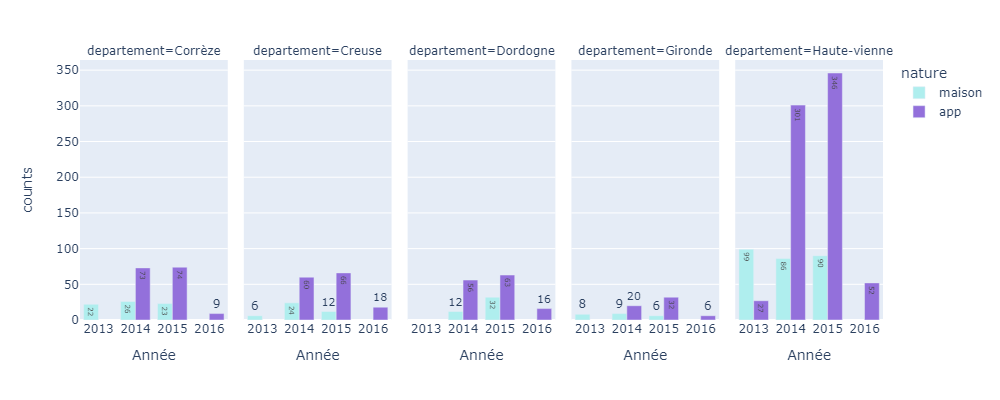

In [35]:
import plotly.express as px
#Groupe les données
df1 = df.groupby(['departement','Année','nature']).size().reset_index(name='counts')

fig = px.bar(df1, x="Année", y="counts", color="nature", barmode="group",
                facet_col="departement",
                text_auto=True,
                color_discrete_sequence=["PaleTurquoise", "MediumPurple"],
                width=1000, height=400
             )
fig.show(renderer='png')

In [36]:
df_quali=df[['nature', 'garage',]]

Boucle for sur chacune des colonnes

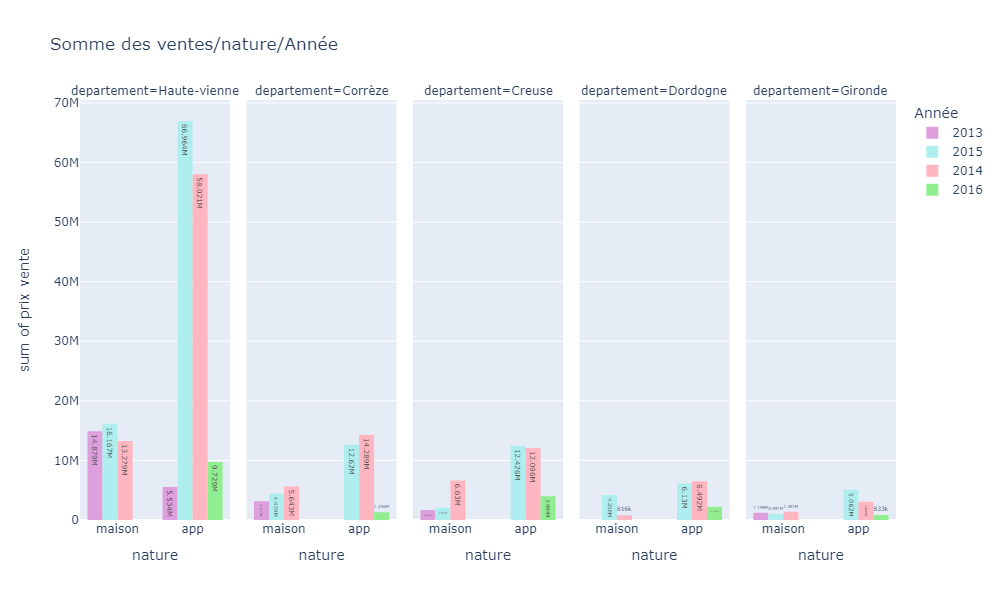

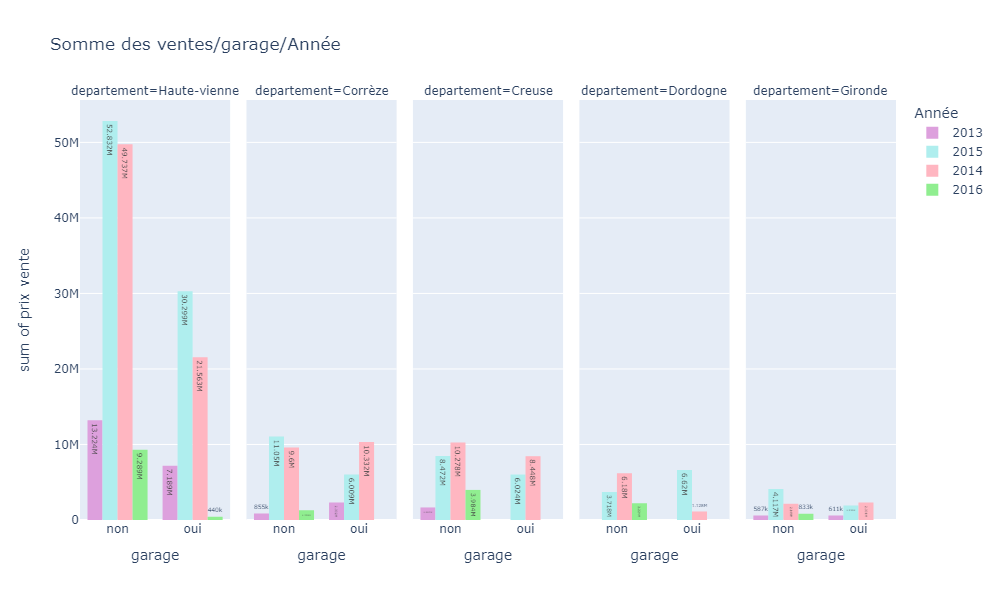

In [52]:

for var in df_quali:
    fig = px.histogram(
        df , x = var, y='prix vente' ,histfunc='sum', title = "Somme des ventes/"+var+"/Année" ,
        color = 'Année',
        barmode="group",
        facet_col="departement",
        text_auto=True,
        height=600,
        width=1000,
        color_discrete_sequence=["plum", "paleturquoise",'lightpink','lightgreen','royalblue']
    )
   

    fig.show(renderer='png')

On sélectionne les colonnes de type object dans un dataframe

In [38]:
df_object = df.select_dtypes("object")

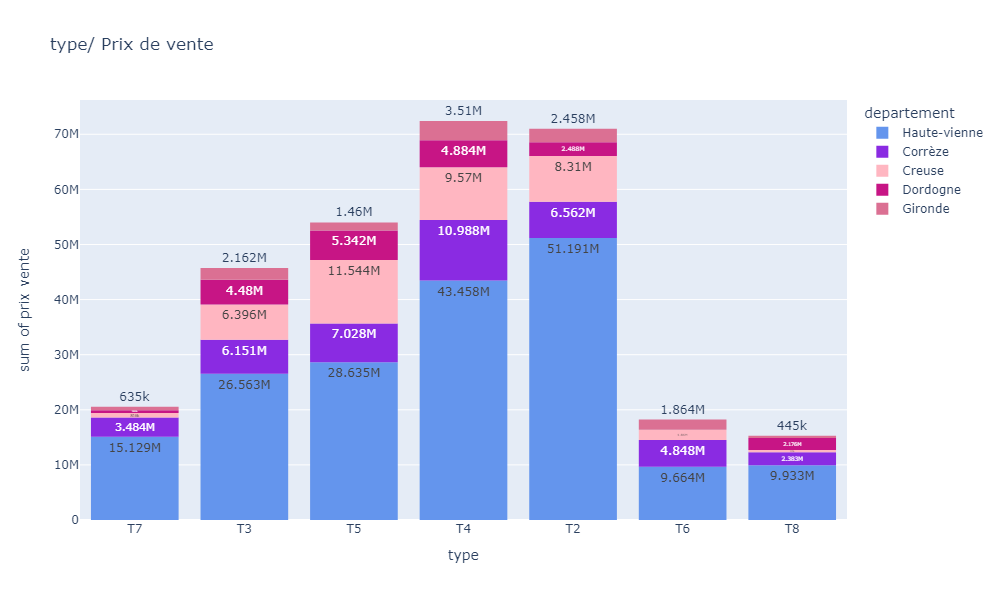

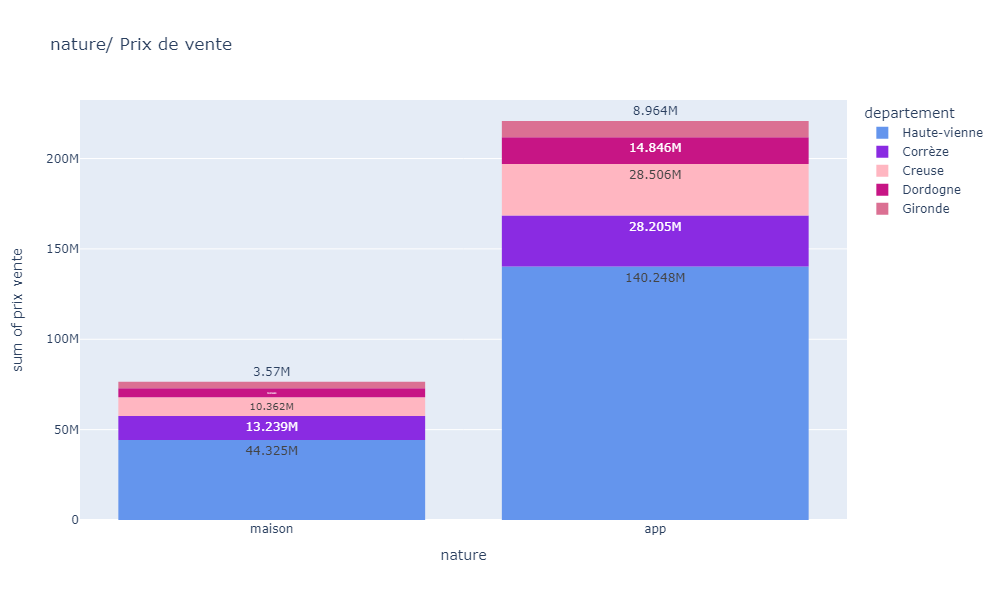

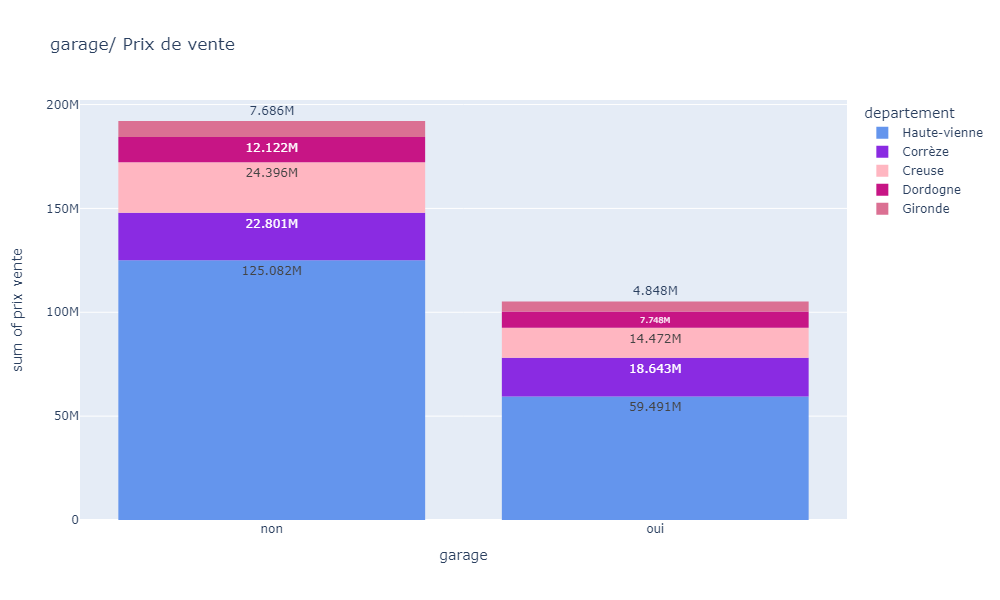

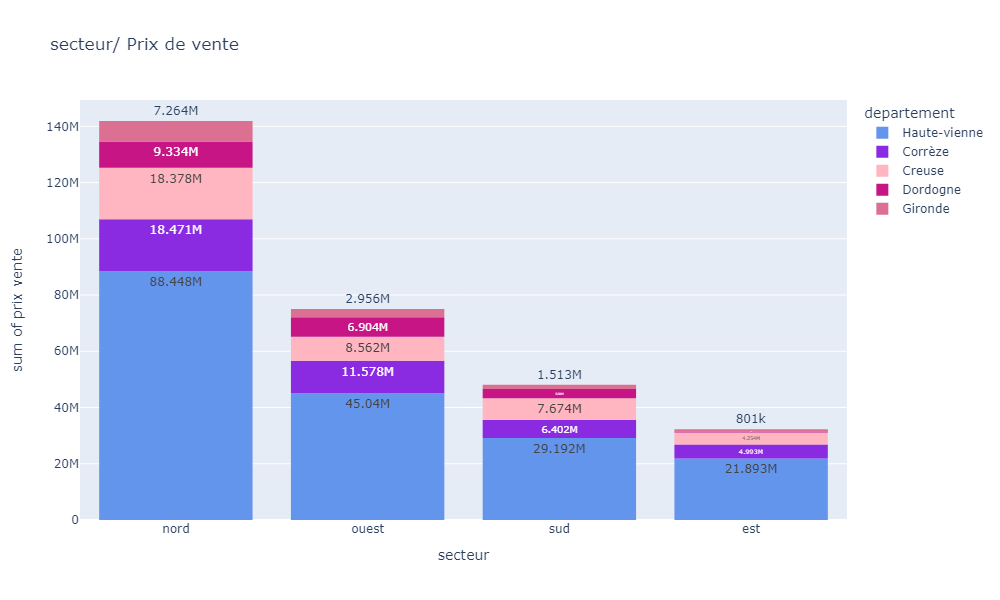

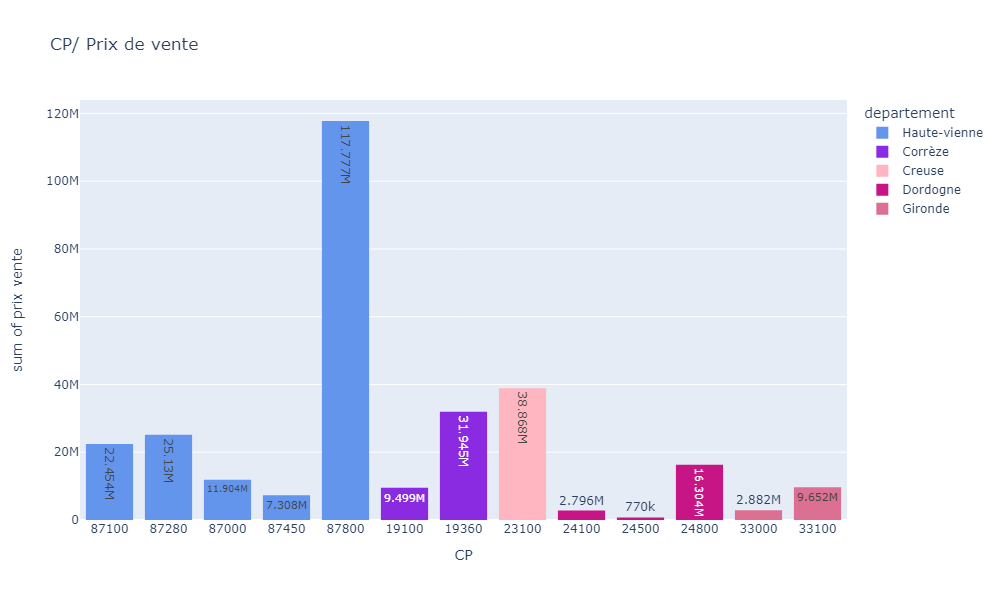

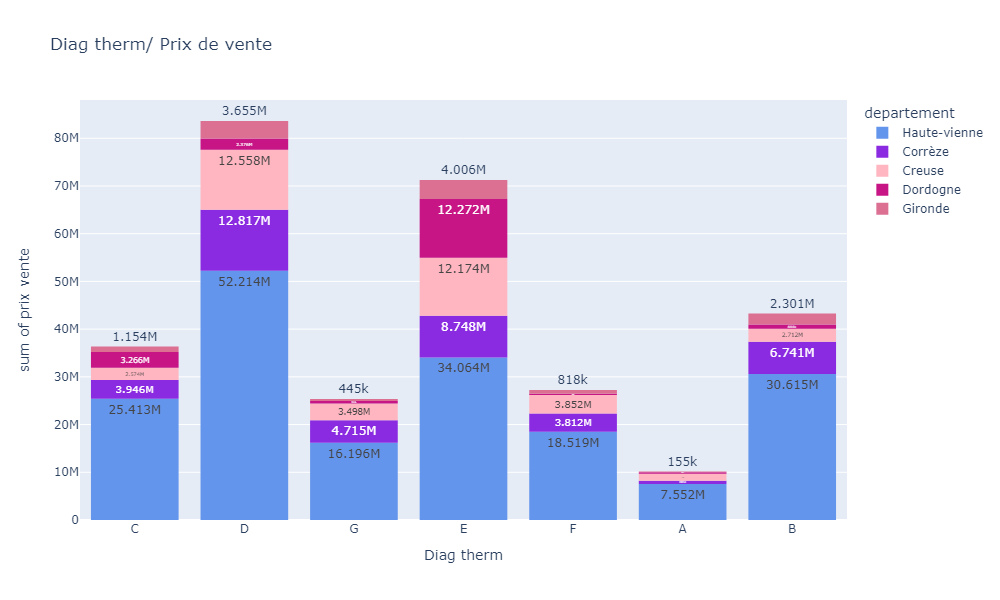

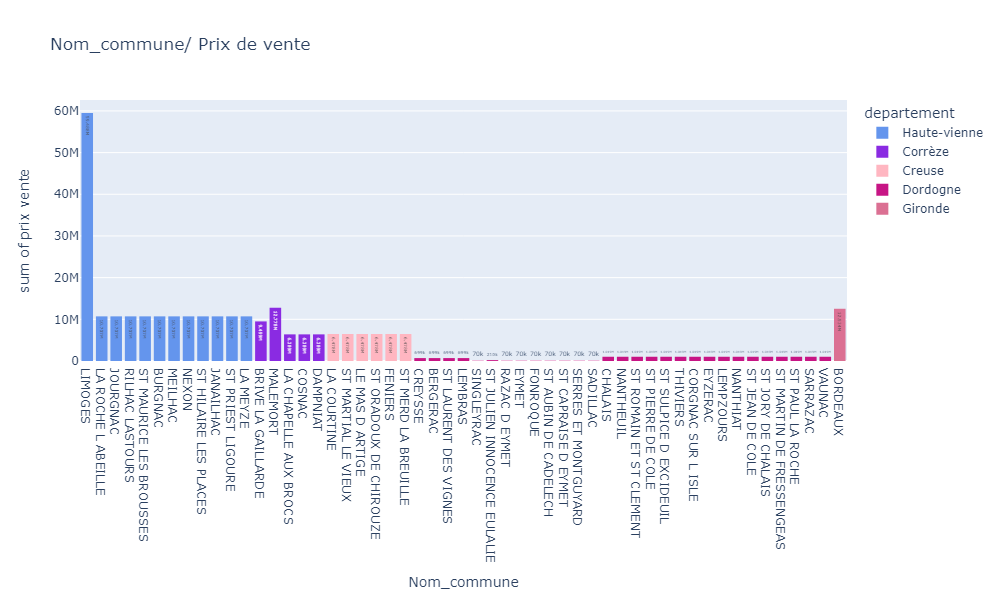

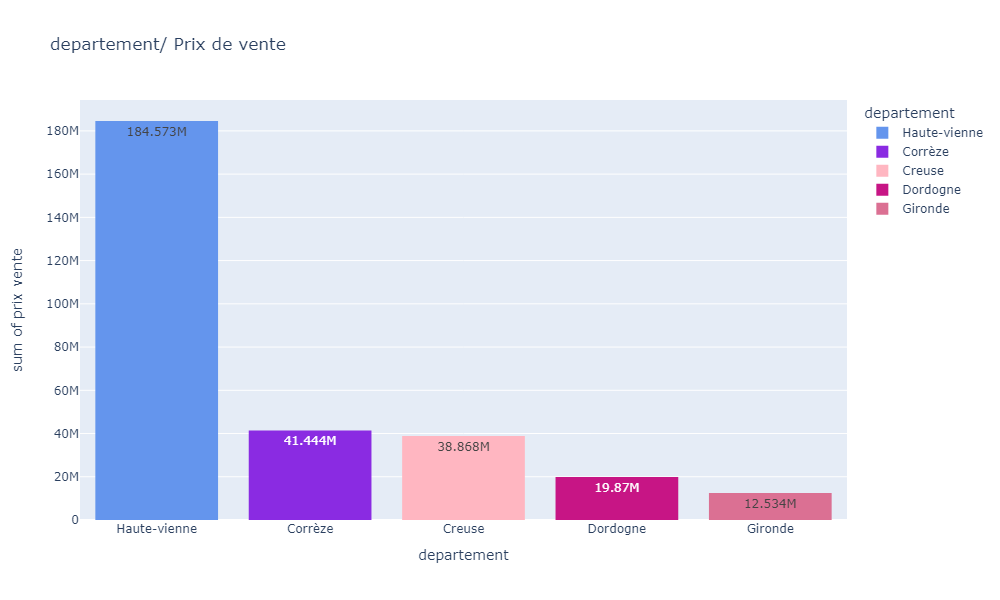

<Figure size 1800x3000 with 0 Axes>

In [39]:
plt.figure(figsize = (18,30))
for var in df_object:
    fig = px.histogram(
        df , x = var, y='prix vente' ,histfunc='sum', title = var+ "/ Prix de vente",
        color = 'departement',
        text_auto=True,
        height=600,
        color_discrete_sequence=["cornflowerblue", "blueviolet",'lightpink','mediumvioletred','palevioletred'],
        width=1000, 
    )
    
    fig.show(renderer='png')

### <a name="C10">Boxplot</a> 
#### Différence de prix entre le prix estimé et le prix de vente

Création de la colonne 'différence de prix' entre le  prix estimé et le prix de vente

In [40]:
df['dif_prix']= df['prix vente']-df['prix estimation']

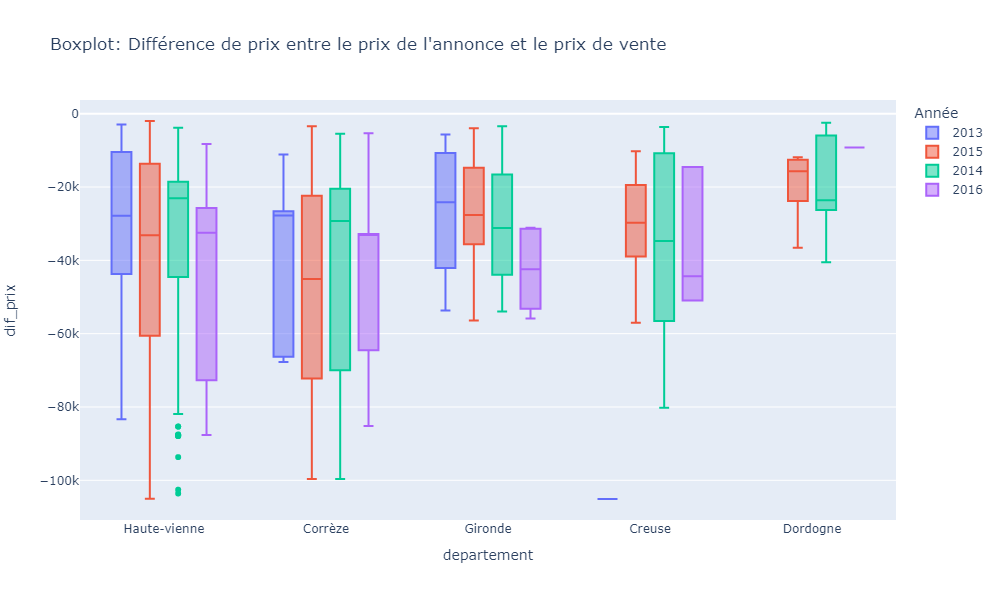

In [41]:
fig = px.box(df , x = "departement", 
                y='dif_prix' , 
                title = "Boxplot: Différence de prix entre le prix de l'annonce et le prix de vente", 
                color = 'Année',
                width=1000, height=600
        
    )
fig.show(renderer='png')

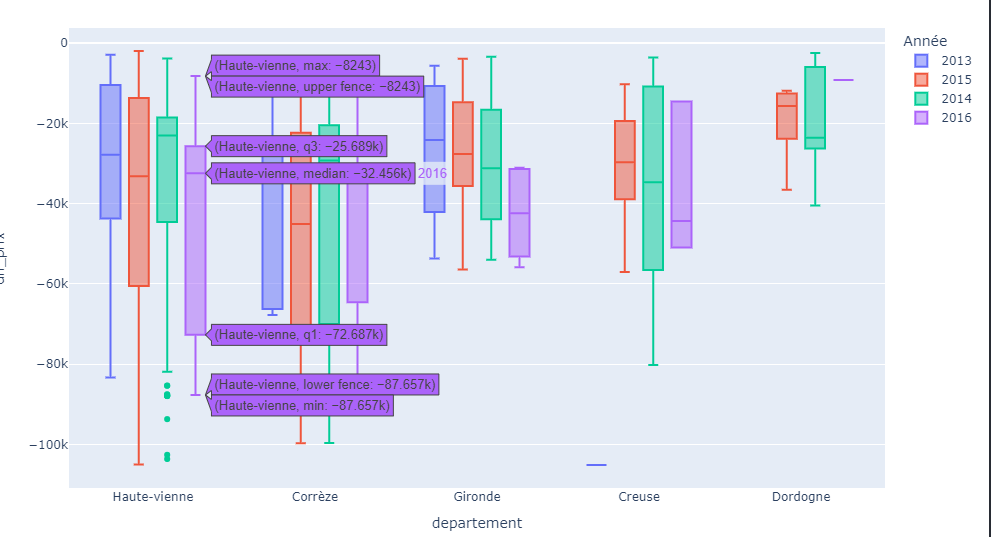

In [42]:
from IPython.display import Image
Image("dif_prix.png")

#### Durée entre la date de l'annonce et la date de vente

Création de la colonne différence date

In [43]:
df['diff_date'] = df['date vente'] - df['date annonce']

In [44]:
df['days'] = df['diff_date'].dt.days

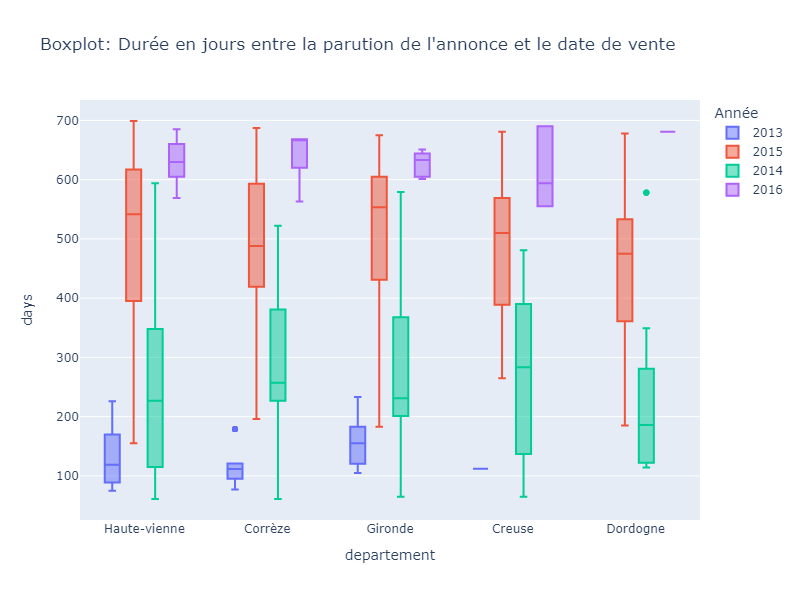

In [45]:
fig = px.box(df , x = "departement", y='days' , title = "Boxplot: Durée en jours entre la parution de l'annonce et le date de vente",
        color = 'Année',
         width=800, height=600
        
    )
fig.show(renderer='png')

Visualisation intéractive non disponible sur GitHup.

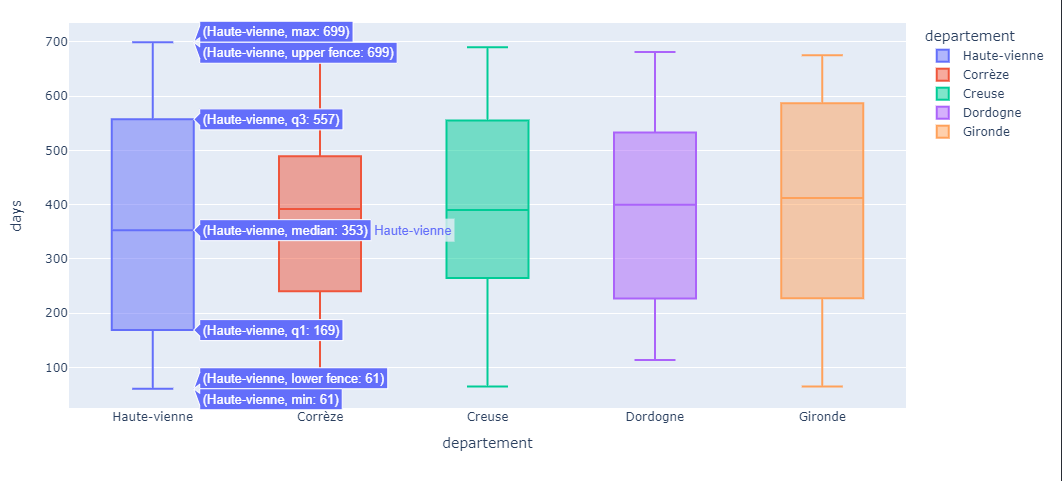

In [46]:
from IPython.display import Image
Image("day.png")

#### Corrélation entre le prix de vente et les variables qualitatives

Après une première visualisation, j'ai sélectionné les colonnes superficie, jardin et diff_prix

### <a name="C11">Nuage de points avec Plotly Express</a> 
Corrélation 
Création d'une boucle for pour chacune de ces 3 colonnes.





In [47]:
df_cor=df[['superficie','jardin','dif_prix']]

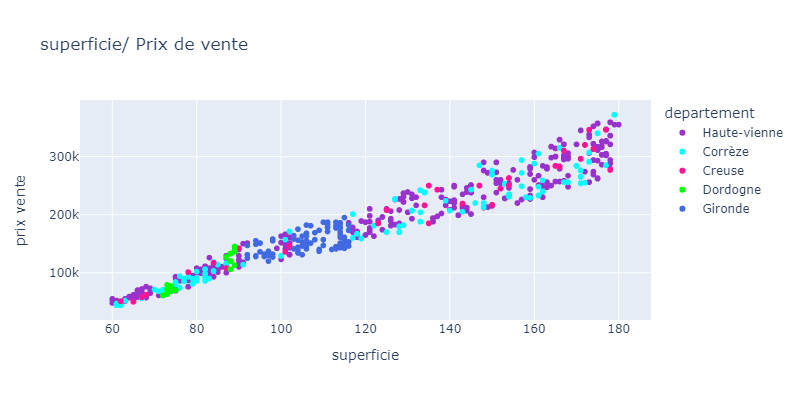

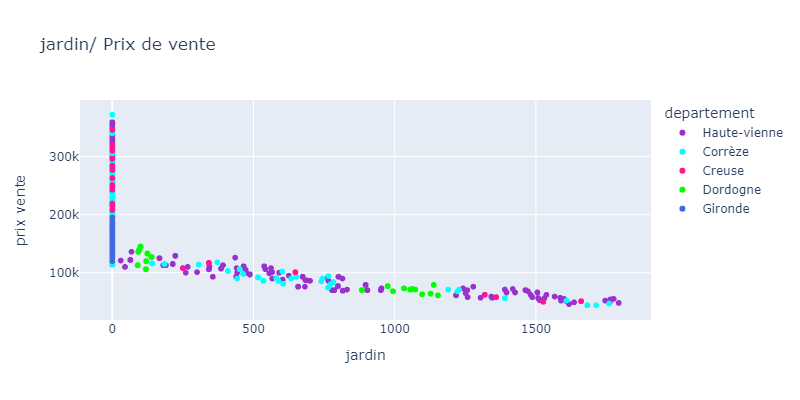

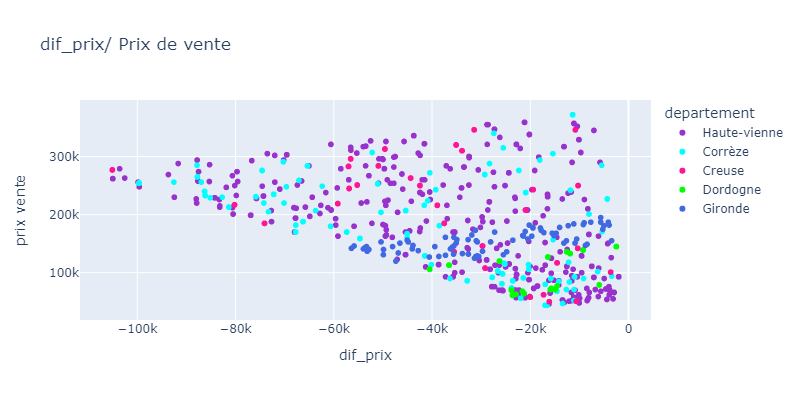

In [48]:

for var in df_cor:
    fig = px.scatter(
        df , x = var, y='prix vente' , title = var+ "/ Prix de vente",
        color = 'departement',
        color_discrete_sequence=["darkorchid", "cyan",'deeppink','lime','royalblue'],
        width=800, height=400
    )
    fig.show(renderer='png')

### <a name="C12">Pie Chart</a> 

Filtrer le dataframe afin de conserver uniquement les données pour la ville de Limoges.

In [49]:
df_limoges=df[(df.Nom_commune =='LIMOGES')]

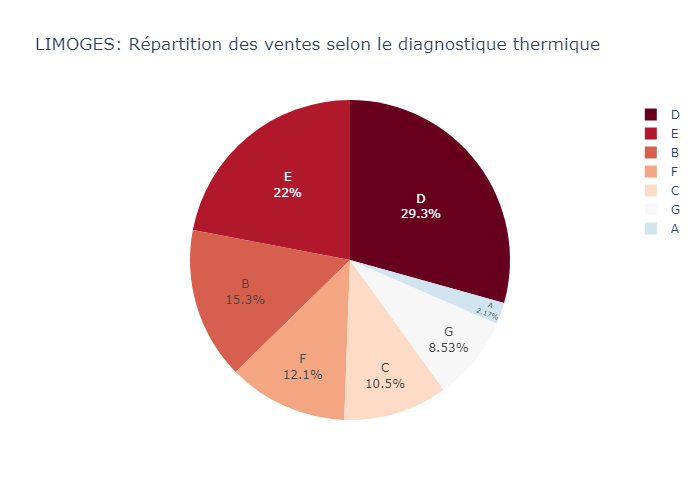

In [50]:
import plotly.express as px

fig = px.pie(df_limoges, values='prix vente', names='Diag therm', color_discrete_sequence=px.colors.sequential.RdBu,title = "LIMOGES: Répartition des ventes selon le diagnostique thermique ")
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show(renderer='png')